<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/07.%20Week%207/Boosting_or_Bagging_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading



In [ ]:
import pandas as pd

df_heart = pd.read_csv('HeartDisease.csv')
display(df_heart.head())
print(f"Shape of df_heart: {df_heart.shape}")

df_citarum = pd.read_csv('CitarumWater.csv')
display(df_citarum.head())
print(f"Shape of df_citarum: {df_citarum.shape}")

df_income = pd.read_csv('income.csv')
display(df_income.head())
print(f"Shape of df_income: {df_income.shape}")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Shape of df_heart: (303, 14)


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


Shape of df_citarum: (2500, 16)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Shape of df_income: (48842, 15)


## Data exploration

### Subtask:
Explore and understand the data in each of the three datasets.


**Reasoning**:
Explore and understand the data in each of the three datasets by displaying data types, checking for missing values, generating descriptive statistics, and visualizing the distributions of features.



df_heart:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


None

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


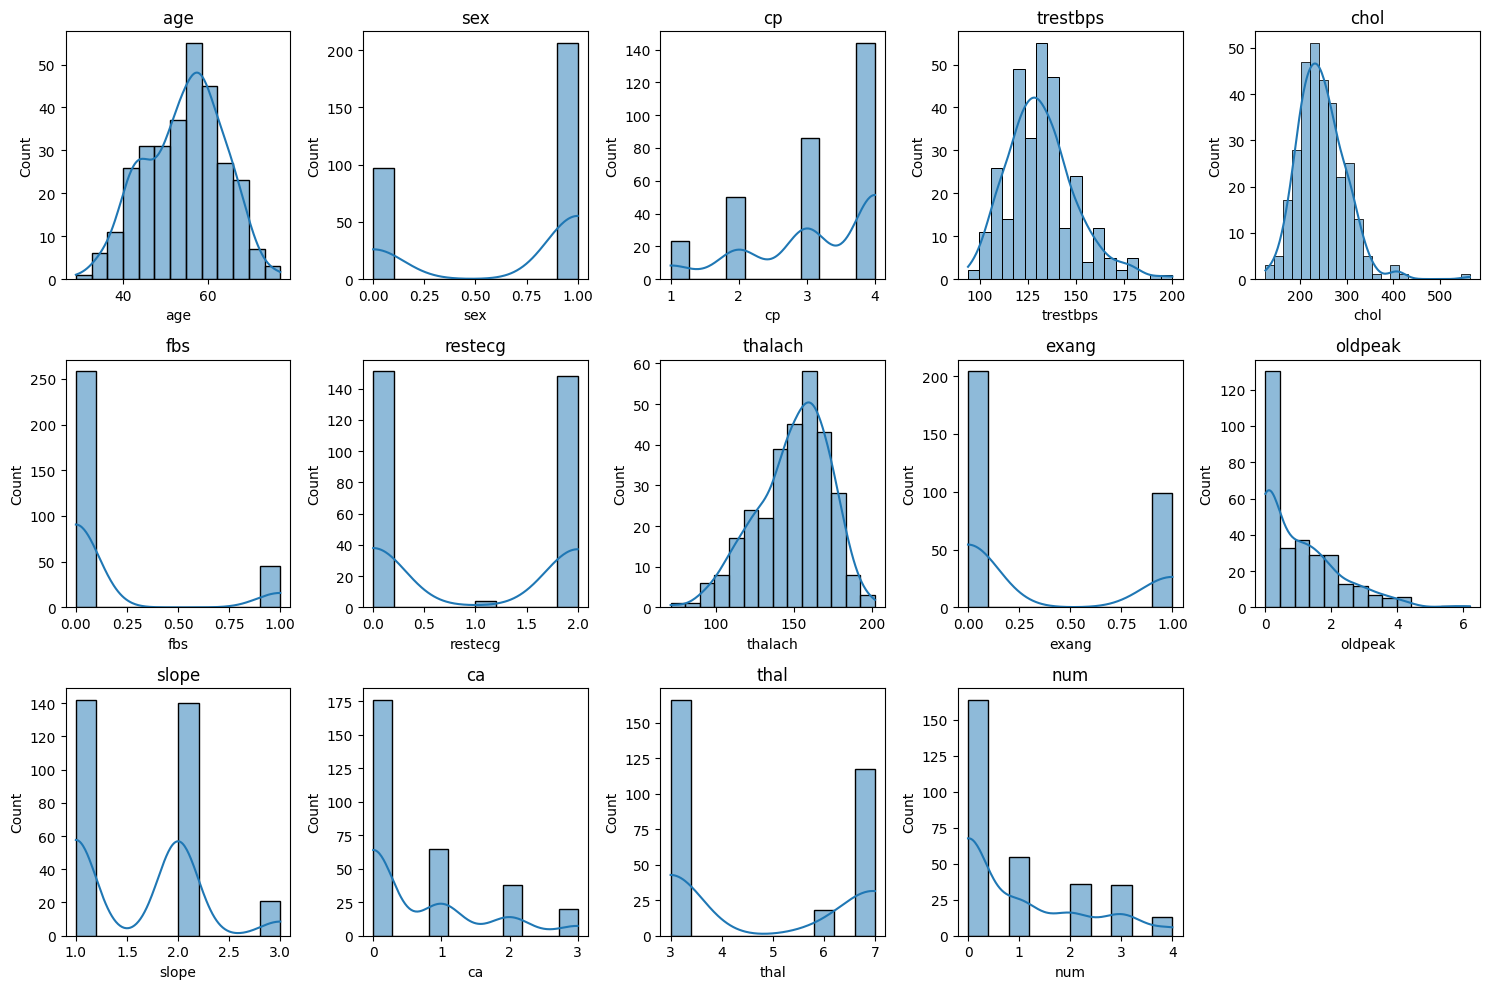


df_citarum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


None

,0
No,0
NamaSungai,0
TitikPantau,0
Waktu,0
pH,0
Temp,0
TSS,0
DO,0
BOD,0
COD,0


,No,pH,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1250.50000,7.032305,27.856368,3.882005,4.005476,20.511768,1.970393,1.418937e+04,0.074547,1.365796,1.650000
std,721.83216,0.578179,10.551351,2.249329,2.697375,8.969809,1.175104,2.526550e+05,0.320970,1.220703,0.547375
min,1.00000,6.002441,5.000000,0.002140,1.640000,5.440000,0.003784,5.000000e+01,0.004300,0.430000,1.000000
25%,625.75000,6.520722,23.597278,1.925925,2.754331,14.999275,0.955443,2.924867e+02,0.048199,0.840000,1.000000
50%,1250.50000,7.056001,27.671133,3.892147,3.800133,20.044252,1.920408,5.375973e+02,0.065606,1.170000,2.000000
75%,1875.25000,7.531846,31.747063,5.828533,4.947965,25.155492,3.014985,7.829760e+02,0.083315,1.570000,2.000000
max,2500.00000,8.710000,318.000000,7.800000,55.300000,190.000000,5.240000,9.200000e+06,16.000000,14.900000,4.000000


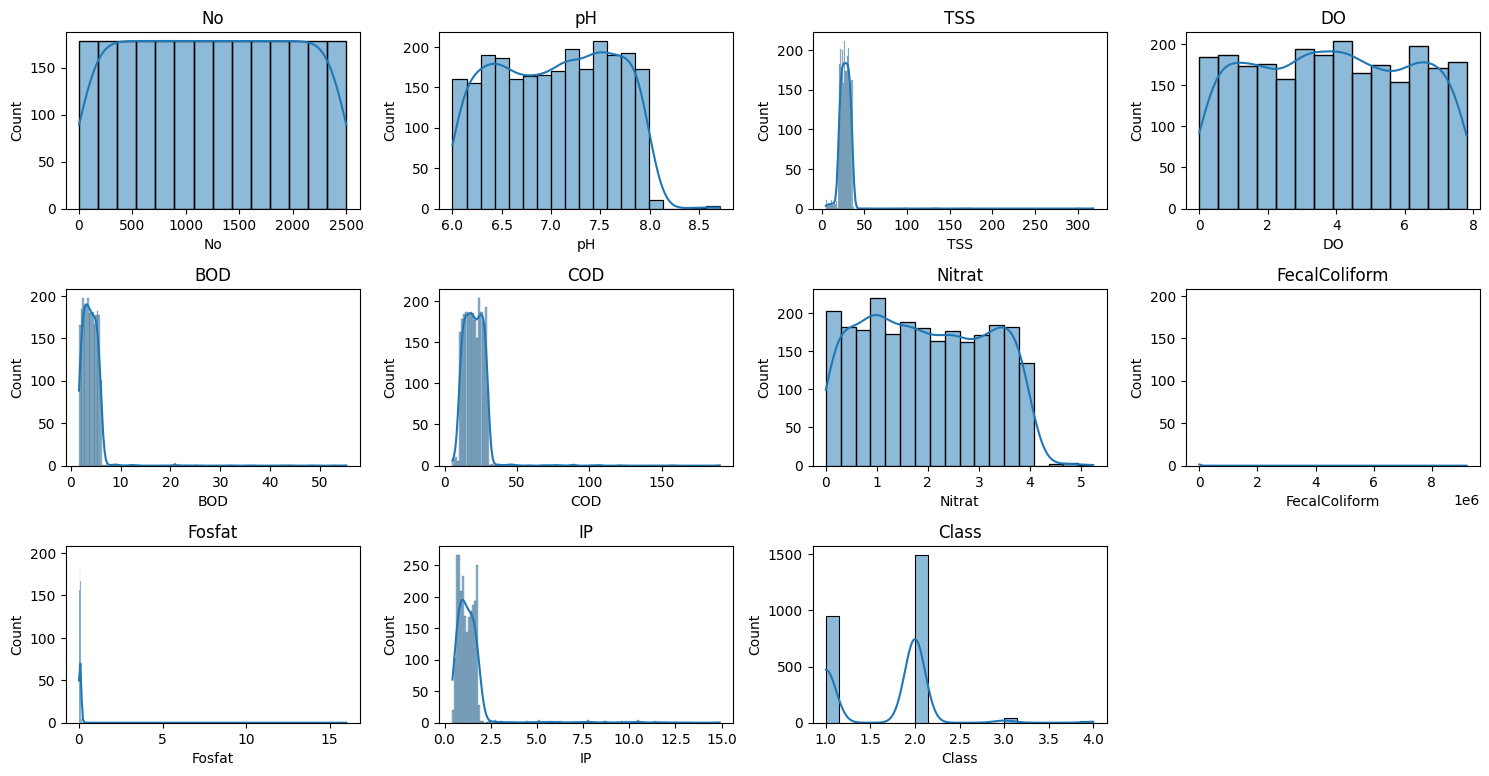

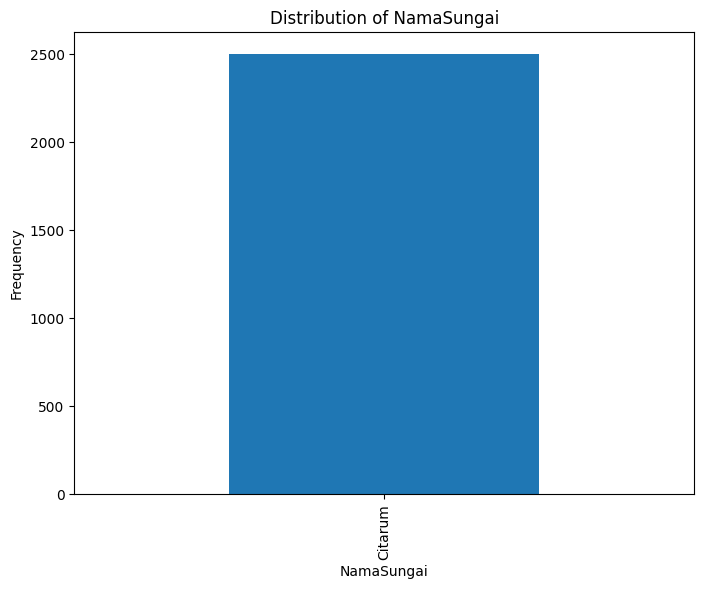

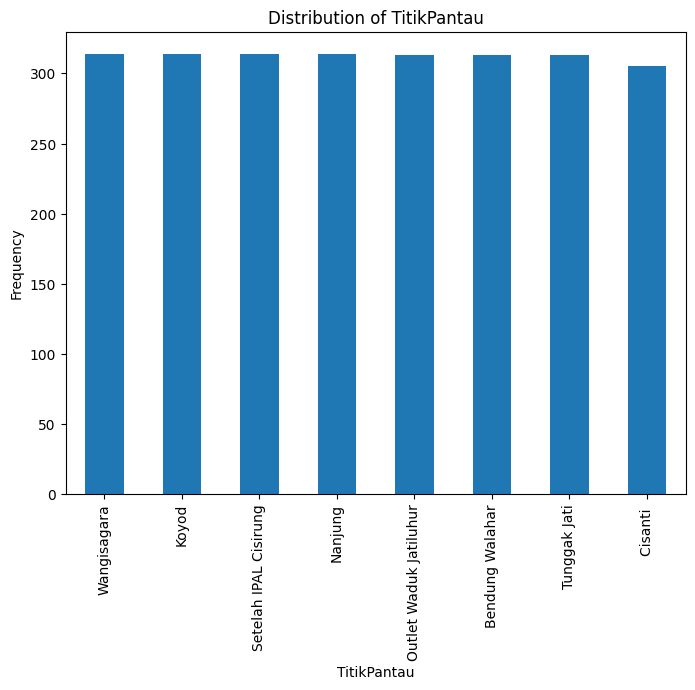

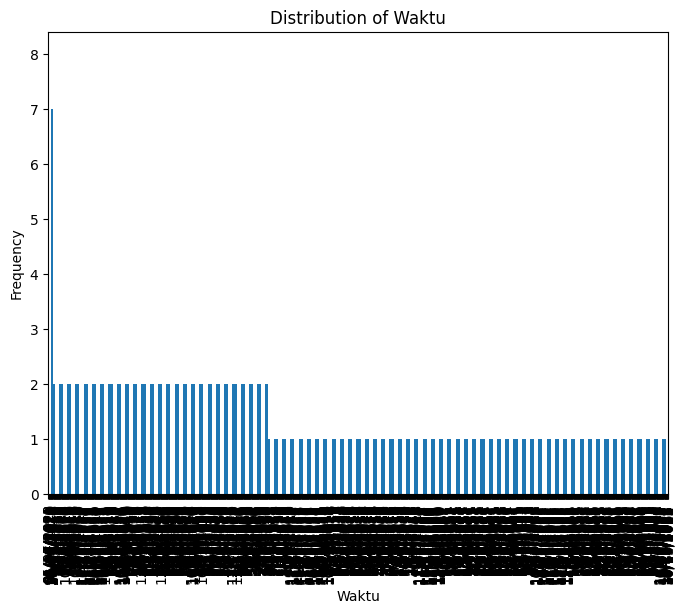

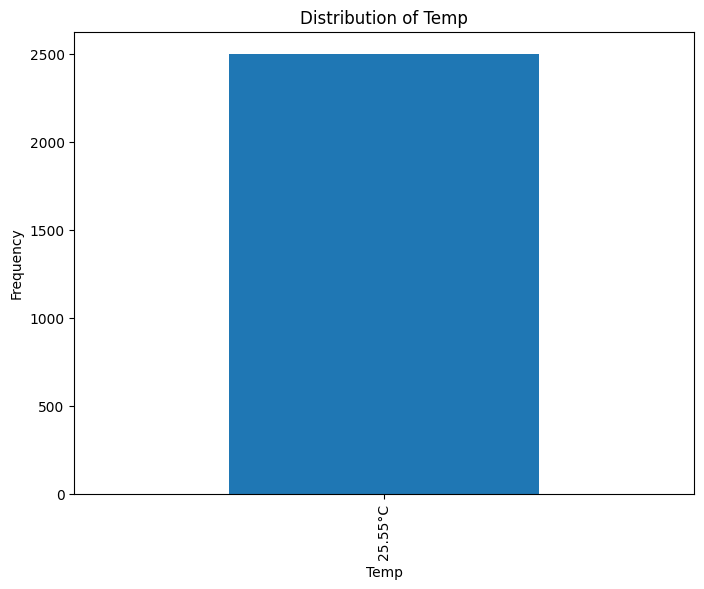

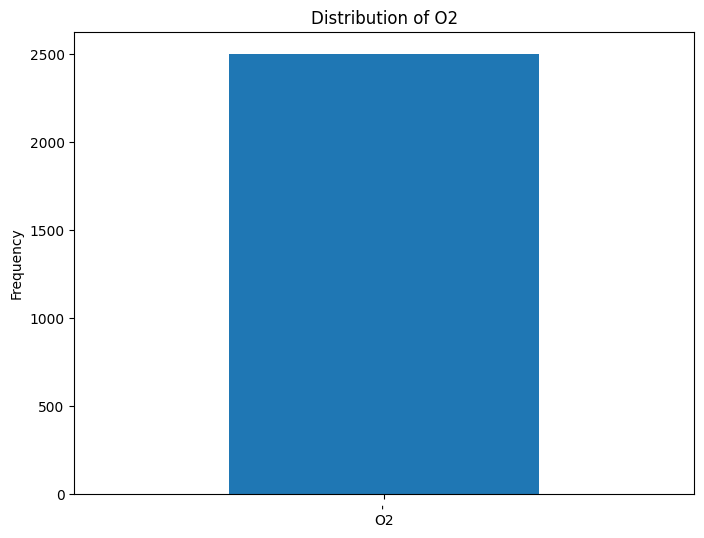


df_income:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


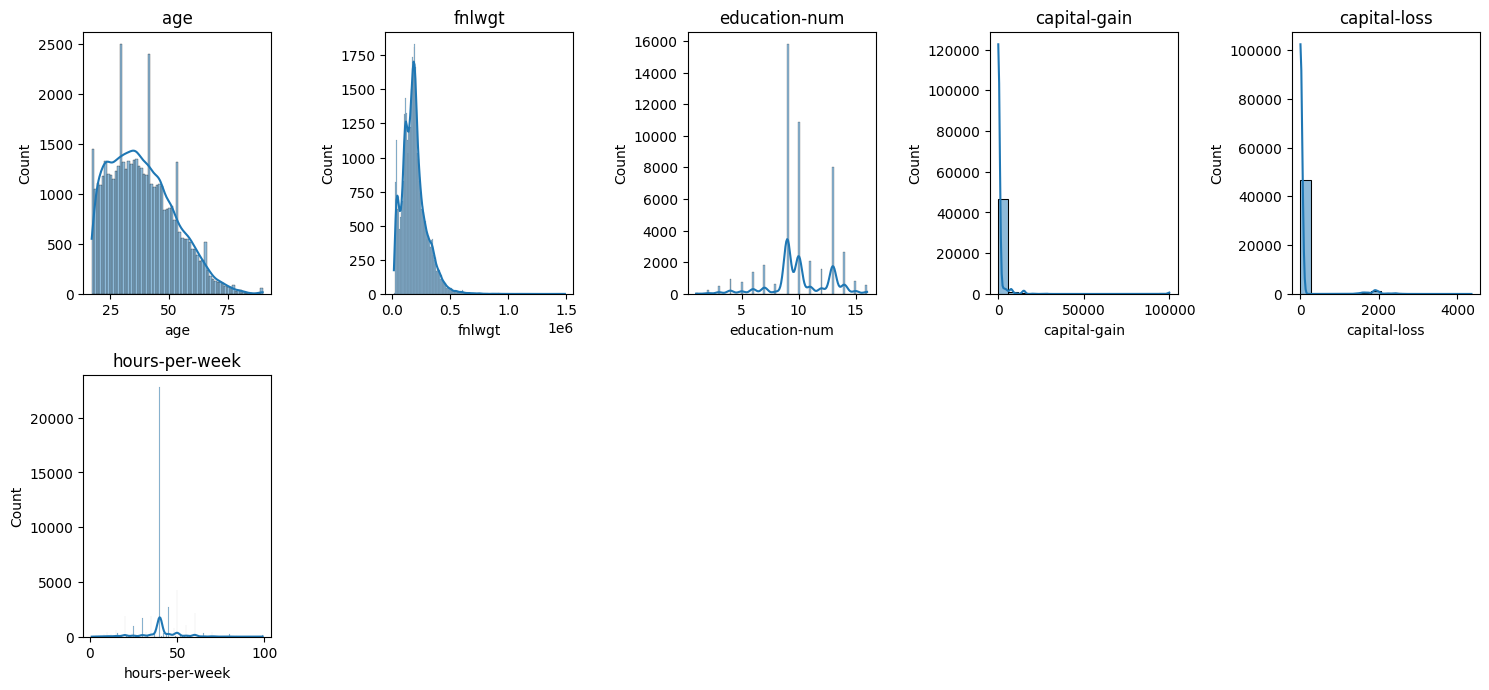

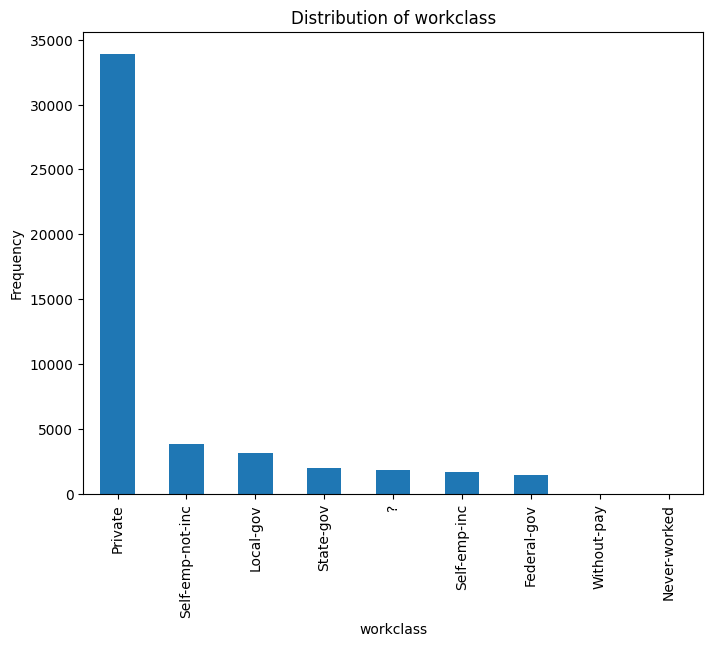

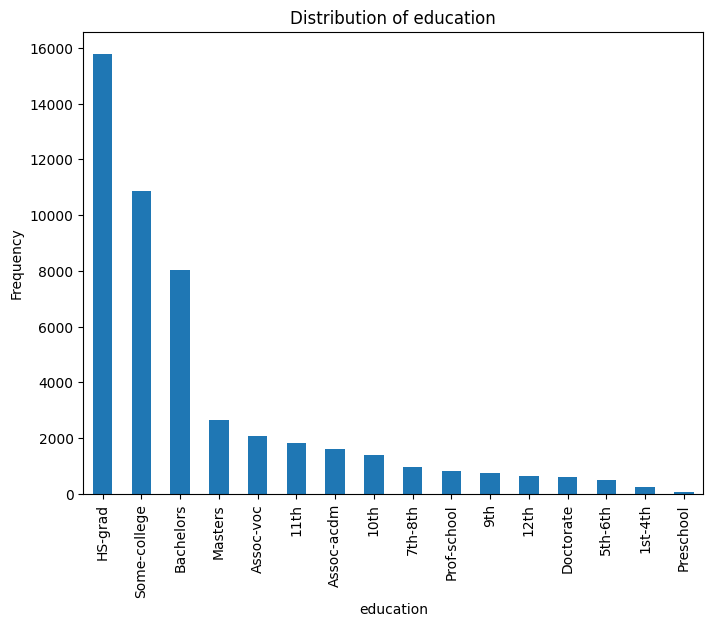

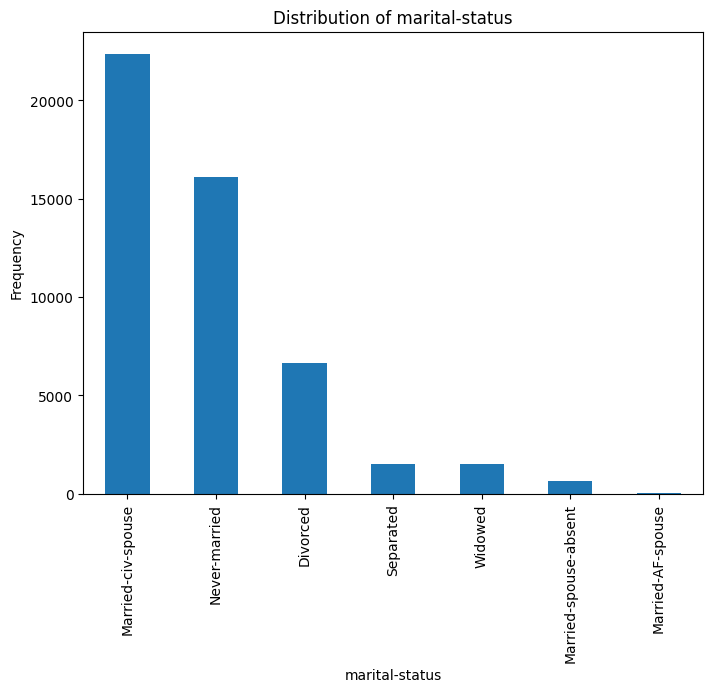

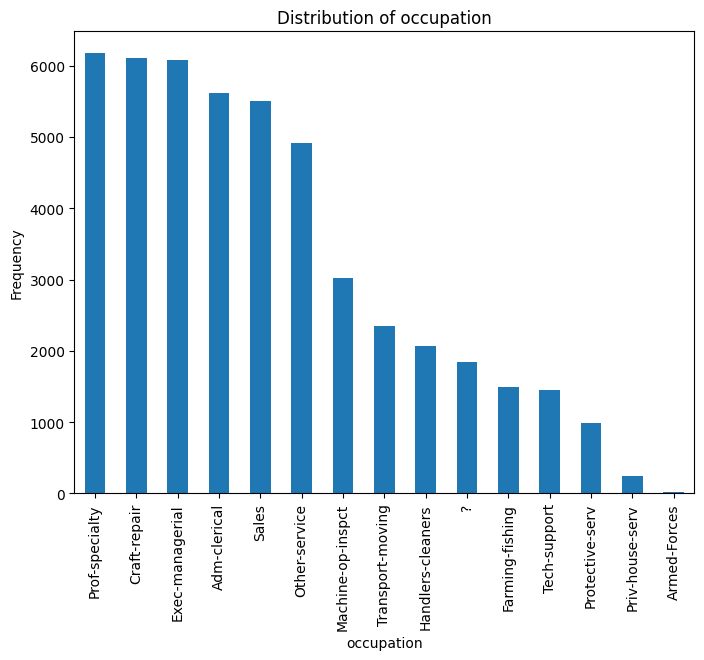

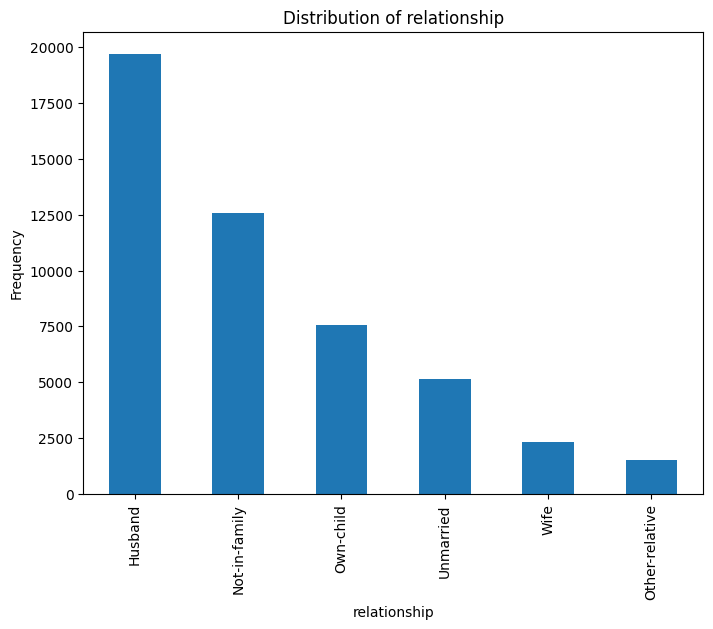

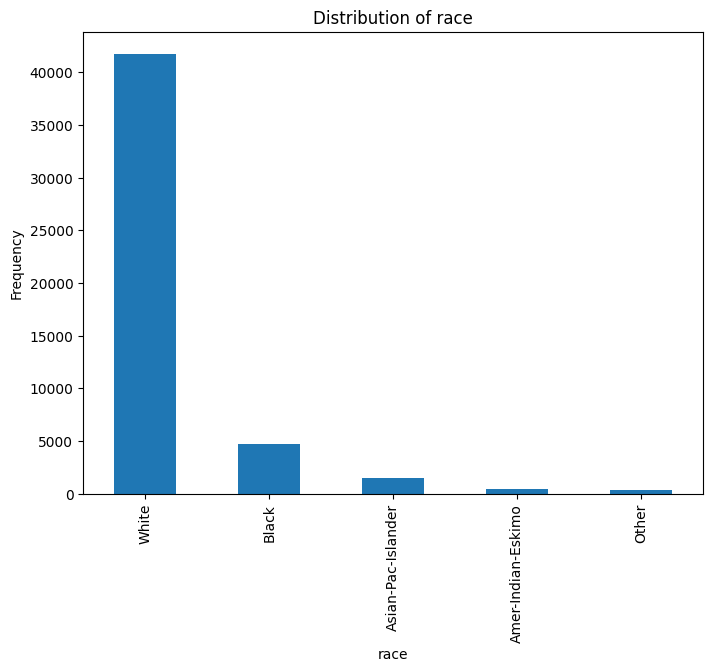

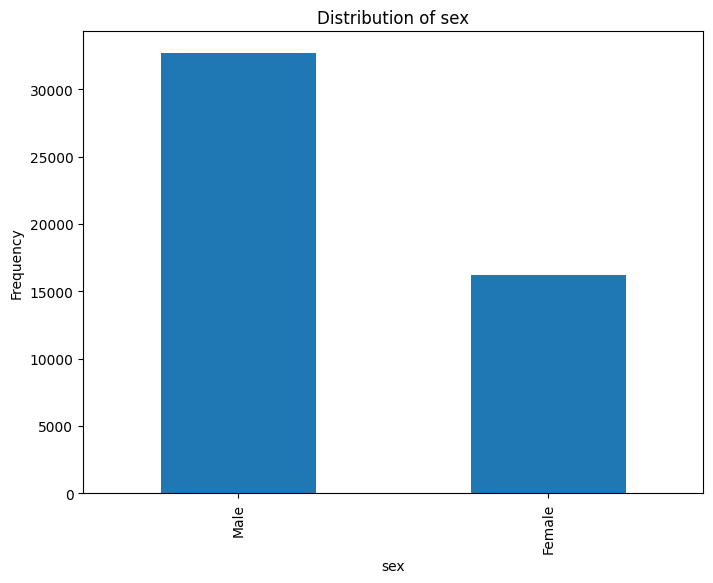

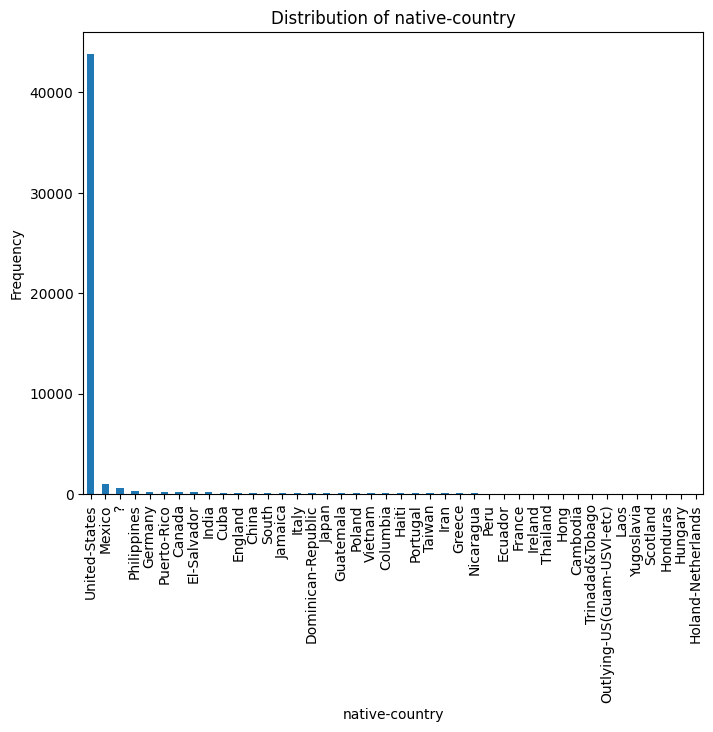

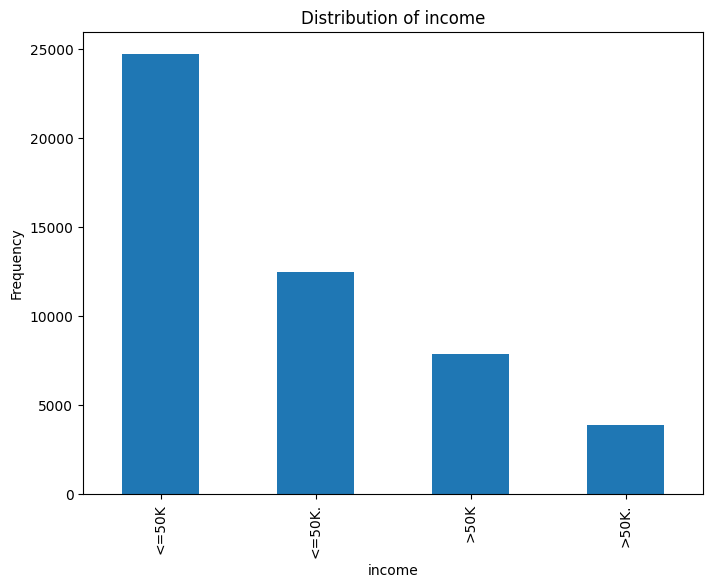

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore df_heart
print("df_heart:")
display(df_heart.info())
display(df_heart.isnull().sum())
display(df_heart.describe())

# Visualize df_heart
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_heart.select_dtypes(include=['number']).columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df_heart[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

for col in df_heart.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(8, 6))
    df_heart[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Explore df_citarum
print("\ndf_citarum:")
display(df_citarum.info())
display(df_citarum.isnull().sum())
display(df_citarum.describe())

# Visualize df_citarum
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_citarum.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_citarum[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

for col in df_citarum.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(8, 6))
    df_citarum[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Explore df_income
print("\ndf_income:")
display(df_income.info())
display(df_income.isnull().sum())
display(df_income.describe())

# Visualize df_income
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_income.select_dtypes(include=['number']).columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df_income[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

for col in df_income.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(8, 6))
    df_income[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Data cleaning

### Subtask:
Clean the three datasets: `df_heart`, `df_citarum`, and `df_income`.


**Reasoning**:
Clean the datasets `df_heart`, `df_citarum`, and `df_income` according to the instructions.



In [ ]:
import numpy as np

# df_heart cleaning
# Impute missing values in 'ca' and 'thal' with the mode
for col in ['ca', 'thal']:
    df_heart[col] = df_heart[col].fillna(df_heart[col].mode()[0])

# Outlier handling for 'chol' and 'oldpeak' using IQR
for col in ['chol', 'oldpeak']:
    Q1 = df_heart[col].quantile(0.25)
    Q3 = df_heart[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_heart[col] = np.clip(df_heart[col], lower_bound, upper_bound)


# df_citarum cleaning
# Convert 'Temp' and 'O2' to numeric, handling errors
for col in ['Temp', 'O2']:
    df_citarum[col] = pd.to_numeric(df_citarum[col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    df_citarum[col] = df_citarum[col].fillna(df_citarum[col].mean())

# Outlier handling for specified columns in df_citarum using IQR
for col in ['TSS', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']:
    Q1 = df_citarum[col].quantile(0.25)
    Q3 = df_citarum[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_citarum[col] = np.clip(df_citarum[col], lower_bound, upper_bound)


# df_income cleaning
# Impute missing values in categorical columns with 'Missing'
for col in ['workclass', 'occupation', 'native-country']:
    df_income[col] = df_income[col].fillna('Missing')

# Logarithmic transformation of 'capital-gain' and 'capital-loss'
for col in ['capital-gain', 'capital-loss']:
    df_income[col] = np.log1p(df_income[col])

# Display cleaned data
display(df_heart.head())
display(df_heart.describe())
display(df_citarum.head())
display(df_citarum.describe())
display(df_income.head())
display(df_income.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,245.584158,0.148515,0.990099,149.607261,0.326733,1.024422,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,47.558803,0.356198,0.994971,22.875003,0.469794,1.110127,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,371.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,4.000000


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55,11.3726,6.11,3.30,6.10,1.08,1518.709944,0.04300,NaN,2.665,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55,13.0000,6.20,5.31,12.50,1.85,1518.709944,0.01100,NaN,2.665,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55,15.0000,3.61,7.40,23.50,1.25,1518.709944,0.13599,NaN,2.665,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55,17.0000,3.17,8.13,27.50,1.21,1518.709944,0.05700,NaN,2.665,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55,11.3726,6.82,2.89,5.44,1.04,1518.709944,0.11000,NaN,2.440,2


,No,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
count,2500.00000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,0.0,2500.000000,2500.000000
mean,1250.50000,7.032305,2.555000e+01,27.544157,3.882005,3.863521,20.147118,1.970393,556.950737,0.066162,NaN,1.229666,1.650000
std,721.83216,0.578179,1.154863e-12,5.230462,2.249329,1.322271,6.195738,1.175104,322.511782,0.022943,NaN,0.457971,0.547375
min,1.00000,6.002441,2.555000e+01,11.372600,0.002140,1.640000,5.440000,0.003784,50.000000,0.004300,NaN,0.430000,1.000000
25%,625.75000,6.520722,2.555000e+01,23.597278,1.925925,2.754331,14.999275,0.955443,292.486724,0.048199,NaN,0.840000,1.000000
50%,1250.50000,7.056001,2.555000e+01,27.671133,3.892147,3.800133,20.044252,1.920408,537.597278,0.065606,NaN,1.170000,2.000000
75%,1875.25000,7.531846,2.555000e+01,31.747063,5.828533,4.947965,25.155492,3.014985,782.976012,0.083315,NaN,1.570000,2.000000
max,2500.00000,8.710000,2.555000e+01,43.971740,7.800000,8.238416,40.389817,5.240000,1518.709944,0.135990,NaN,2.665000,4.000000


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,<=50K


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,0.728544,0.350973,40.422382
std,13.710510,1.056040e+05,2.570973,2.445480,1.586232,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,11.512925,8.379539,99.000000


## Data preparation

### Subtask:
Prepare the data for modeling.


**Reasoning**:
Split the data into training and testing sets for each dataset, encoding categorical features before splitting.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Heart Disease Dataset
X_heart = df_heart.drop('num', axis=1)
y_heart = df_heart['num']

# Encode categorical features in X_heart
for col in X_heart.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_heart[col] = le.fit_transform(X_heart[col])

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart
)


# Citarum Water Dataset
X_citarum = df_citarum.drop('Class', axis=1)
y_citarum = df_citarum['Class']

# Encode categorical features in X_citarum
for col in X_citarum.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_citarum[col] = le.fit_transform(X_citarum[col])

X_train_citarum, X_test_citarum, y_train_citarum, y_test_citarum = train_test_split(
    X_citarum, y_citarum, test_size=0.2, random_state=42, stratify=y_citarum
)


# Income Dataset
X_income = df_income.drop('income', axis=1)
y_income = df_income['income']

# Encode categorical features in X_income
for col in X_income.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_income[col] = le.fit_transform(X_income[col])

X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(
    X_income, y_income, test_size=0.2, random_state=42, stratify=y_income
)

## Feature engineering

### Subtask:
Feature Engineering


**Reasoning**:
Apply standard scaling to the numerical features of the three datasets and perform feature engineering as instructed.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Heart Disease Dataset
numerical_cols_heart = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler_heart = StandardScaler()
X_train_heart[numerical_cols_heart] = scaler_heart.fit_transform(X_train_heart[numerical_cols_heart])
X_test_heart[numerical_cols_heart] = scaler_heart.transform(X_test_heart[numerical_cols_heart])


# Citarum Water Dataset
numerical_cols_citarum = ['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']
scaler_citarum = StandardScaler()
X_train_citarum[numerical_cols_citarum] = scaler_citarum.fit_transform(X_train_citarum[numerical_cols_citarum])
X_test_citarum[numerical_cols_citarum] = scaler_citarum.transform(X_test_citarum[numerical_cols_citarum])

# Interaction features
X_train_citarum['BOD_COD_interaction'] = X_train_citarum['BOD'] * X_train_citarum['COD']
X_test_citarum['BOD_COD_interaction'] = X_test_citarum['BOD'] * X_test_citarum['COD']


# Income Dataset
numerical_cols_income = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler_income = StandardScaler()
X_train_income[numerical_cols_income] = scaler_income.fit_transform(X_train_income[numerical_cols_income])
X_test_income[numerical_cols_income] = scaler_income.transform(X_test_income[numerical_cols_income])

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_income_poly = poly.fit_transform(X_train_income[numerical_cols_income])
X_test_income_poly = poly.transform(X_test_income[numerical_cols_income])

# Combine polynomial features with other features
# Assuming all features are numerical now. Convert back to DataFrames.
X_train_income = pd.DataFrame(X_train_income_poly, columns=poly.get_feature_names_out(numerical_cols_income))
X_test_income = pd.DataFrame(X_test_income_poly, columns=poly.get_feature_names_out(numerical_cols_income))

## Model training

### Subtask:
Train boosting and bagging models for each dataset.


**Reasoning**:
Train boosting and bagging models for each dataset.



In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


## Model training

### Subtask:
Retry model training: Train boosting and bagging models for each dataset. Address previous errors related to target variable encoding and class labels.


**Reasoning**:
Fix the target variable encoding and class labels for Citarum and Income datasets, then train the models with appropriate parameters and error handling.



In [ ]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable for Income dataset
le_income = LabelEncoder()
y_train_income = le_income.fit_transform(y_train_income)
y_test_income = le_income.transform(y_test_income)

# Correct the target variable for Citarum Water dataset
le_citarum = LabelEncoder()
y_train_citarum = le_citarum.fit_transform(y_train_citarum)
y_test_citarum = le_citarum.transform(y_test_citarum)

print("Unique values in y_train_citarum after encoding:", np.unique(y_train_citarum))
print("Unique values in y_test_citarum after encoding:", np.unique(y_test_citarum))
print("Unique values in y_train_income after encoding:", np.unique(y_train_income))
print("Unique values in y_test_income after encoding:", np.unique(y_test_income))

def train_models(X_train, y_train, X_test, y_test, dataset_name):
    try:
        xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
        xgb_model.fit(X_train, y_train)

        lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
        lgb_model.fit(X_train, y_train)

        catboost_model = CatBoostClassifier(random_state=42, verbose=0)
        catboost_model.fit(X_train, y_train)

        rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
        rf_model.fit(X_train, y_train)

        print(f"Successfully trained models for {dataset_name} dataset.")
        return xgb_model, lgb_model, catboost_model, rf_model
    except ValueError as e:
        print(f"Error training models for {dataset_name} dataset: {e}")
        print(f"Unique values of target variable: {np.unique(y_train)}")
        return None, None, None, None


xgb_model_heart, lgb_model_heart, catboost_model_heart, rf_model_heart = train_models(X_train_heart, y_train_heart, X_test_heart, y_test_heart, "Heart")
xgb_model_citarum, lgb_model_citarum, catboost_model_citarum, rf_model_citarum = train_models(X_train_citarum, y_train_citarum, X_test_citarum, y_test_citarum, "Citarum")
xgb_model_income, lgb_model_income, catboost_model_income, rf_model_income = train_models(X_train_income, y_train_income, X_test_income, y_test_income, "Income")

Unique values in y_train_citarum after encoding: [0 1 2 3]
Unique values in y_test_citarum after encoding: [0 1 2 3]
Unique values in y_train_income after encoding: [0 1 2 3]
Unique values in y_test_income after encoding: [0 1 2 3]
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

## Model evaluation

### Subtask:
Evaluate the performance of the trained models.


**Reasoning**:
Import necessary libraries for model evaluation and initialize a list to store evaluation results.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

evaluation_results = []

**Reasoning**:
Evaluate the performance of each model on each dataset using the specified metrics and store the results in the `evaluation_results` list.



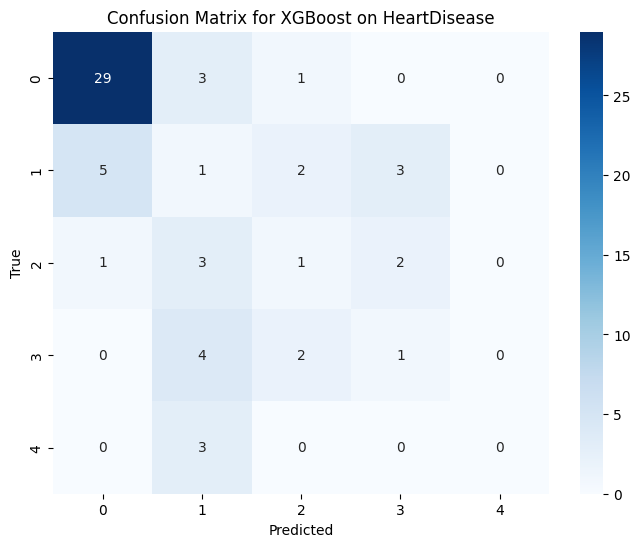

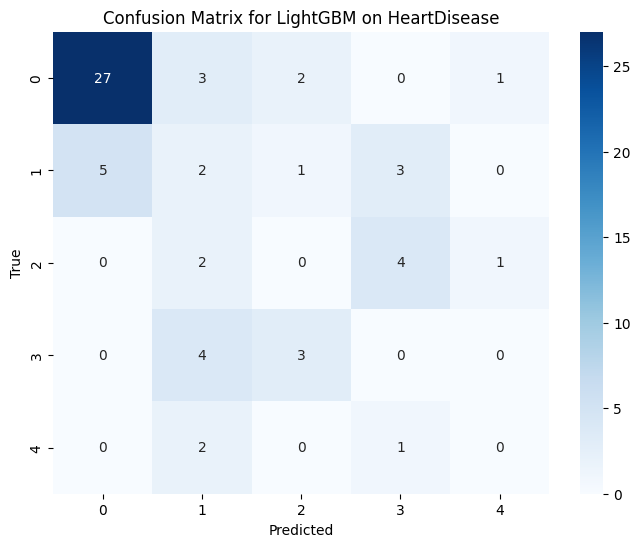

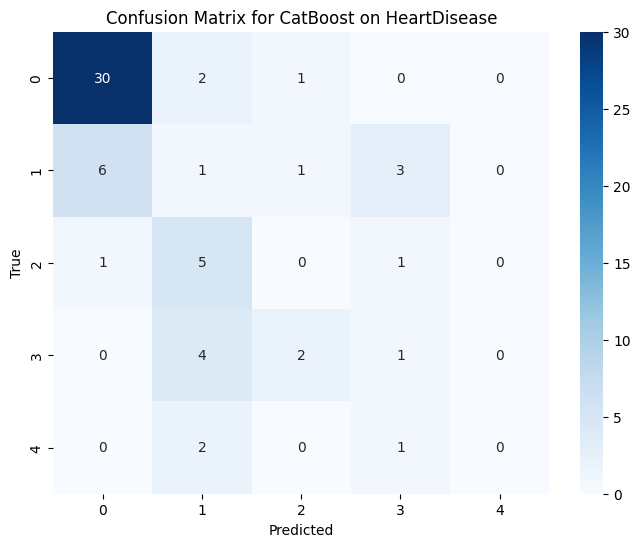

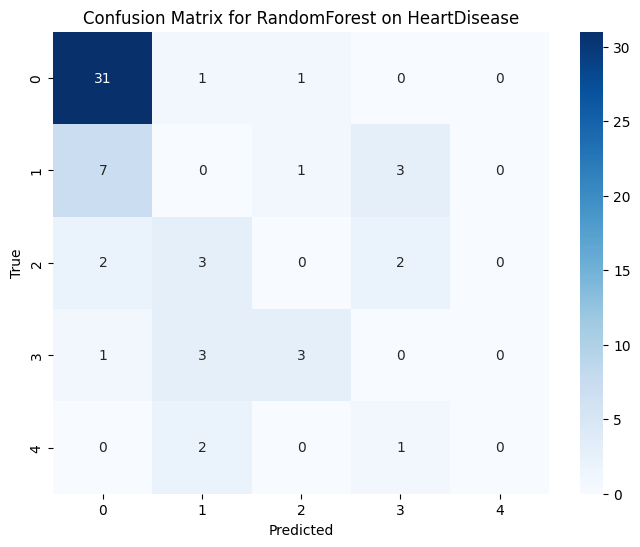

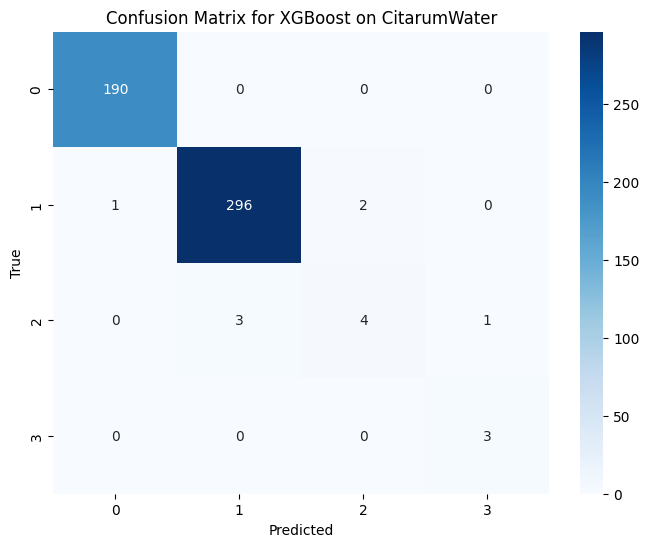

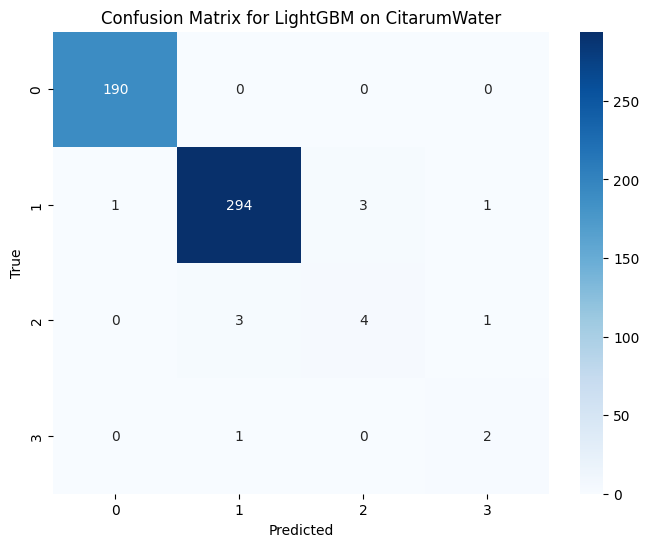

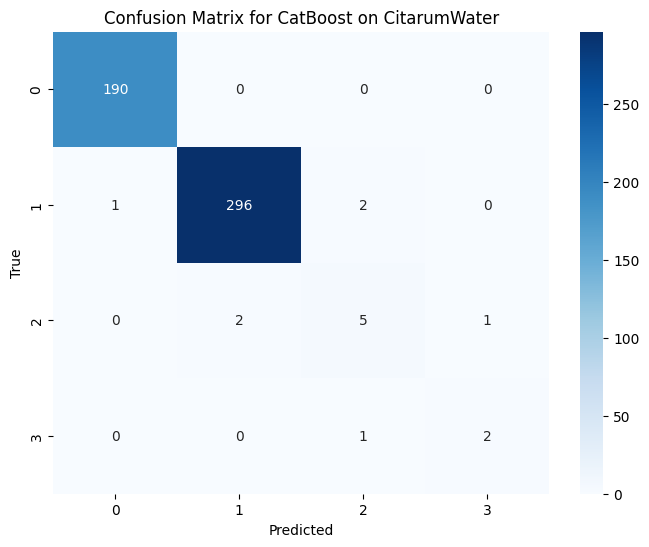

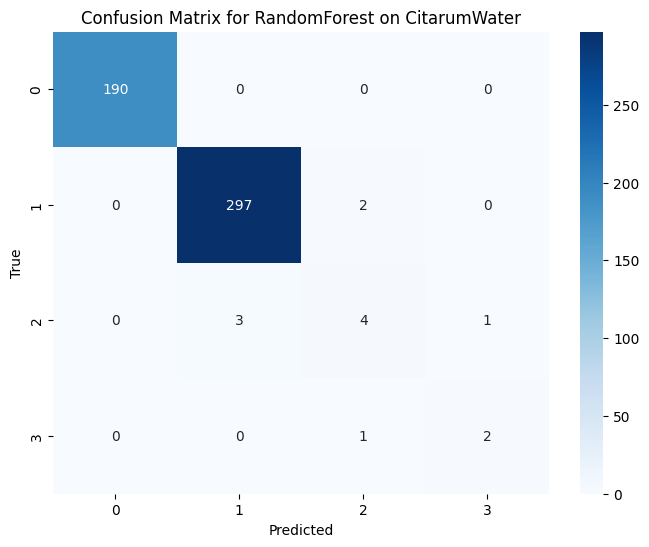

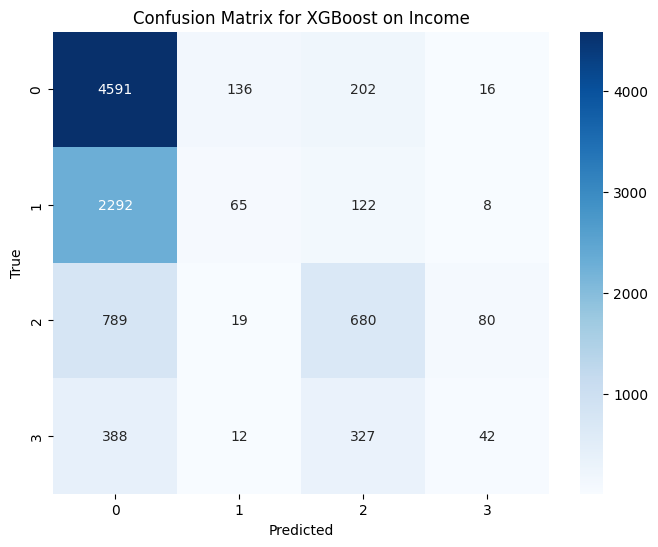

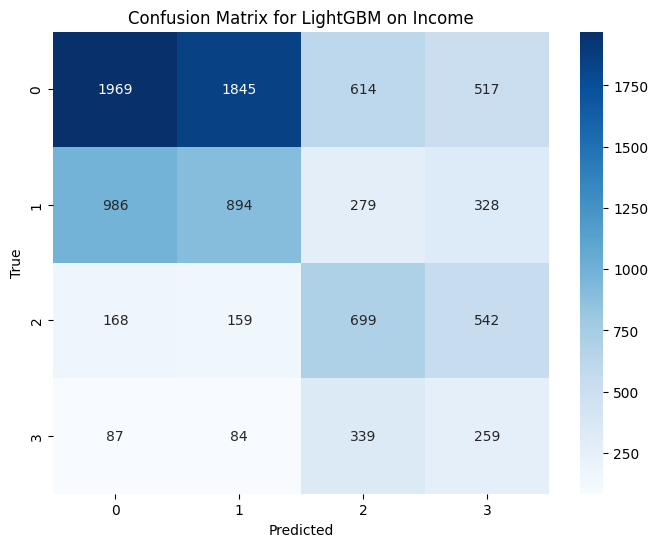

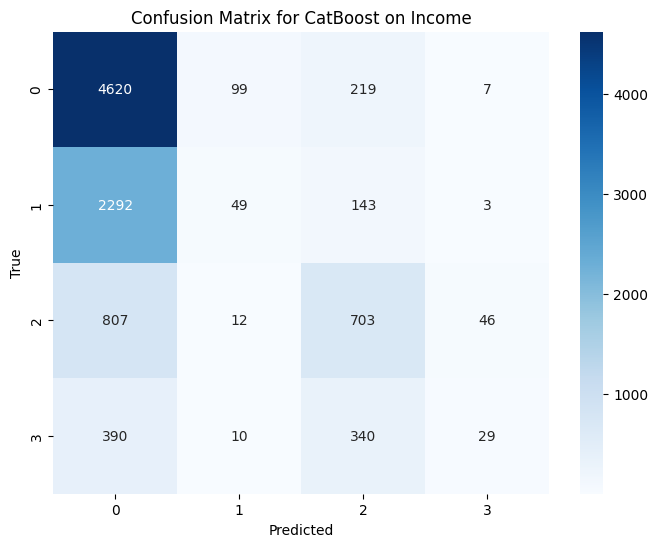

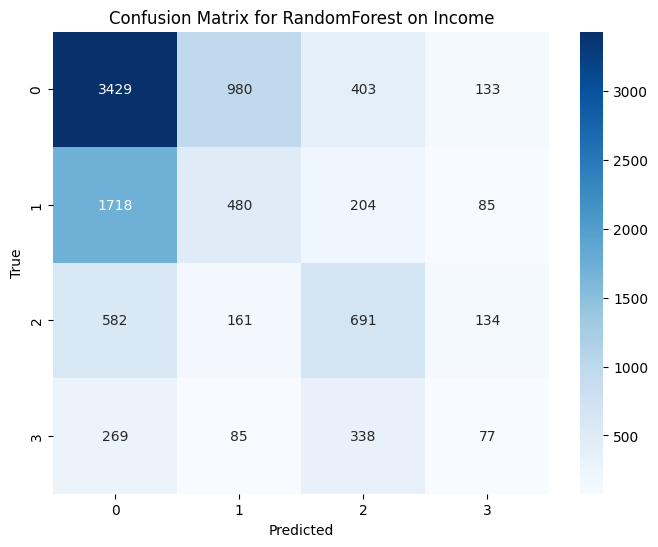

,Dataset,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,HeartDisease,XGBoost,0.524590,0.246667,0.251082,0.248127,0.752237
1,HeartDisease,LightGBM,0.475410,0.199519,0.200000,0.199487,0.715106
2,HeartDisease,CatBoost,0.524590,0.209781,0.228571,0.218198,0.757698
3,HeartDisease,RandomForest,0.508197,0.151220,0.187879,0.167568,0.794320
4,CitarumWater,XGBoost,0.986000,0.850349,0.872492,0.853978,0.998300
5,CitarumWater,LightGBM,0.980000,0.763193,0.787486,0.771765,0.997322
6,CitarumWater,CatBoost,0.986000,0.819930,0.820408,0.820167,0.998061
7,CitarumWater,RandomForest,0.986000,0.807024,0.789994,0.797913,0.998135
8,Income,XGBoost,0.550517,0.412085,0.360710,0.328695,0.721023
9,Income,LightGBM,0.391135,0.358134,0.385060,0.355966,0.729052


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    "HeartDisease": (X_train_heart, y_train_heart, X_test_heart, y_test_heart),
    "CitarumWater": (X_train_citarum, y_train_citarum, X_test_citarum, y_test_citarum),
    "Income": (X_train_income, y_train_income, X_test_income, y_test_income),
}

models = {
    "XGBoost": [xgb_model_heart, xgb_model_citarum, xgb_model_income],
    "LightGBM": [lgb_model_heart, lgb_model_citarum, lgb_model_income],
    "CatBoost": [catboost_model_heart, catboost_model_citarum, catboost_model_income],
    "RandomForest": [rf_model_heart, rf_model_citarum, rf_model_income],
}

for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    for model_name, model_list in models.items():
        model = model_list[list(datasets.keys()).index(dataset_name)]
        if model is not None:
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
            recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            try:  # Handle cases where ROC AUC is not applicable
              auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
            except ValueError:
              auc = 0

            evaluation_results.append({
                "Dataset": dataset_name,
                "Model": model_name,
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1_Score": f1,
                "AUC": auc,
            })

            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f"Confusion Matrix for {model_name} on {dataset_name}")
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.show()


results_df = pd.DataFrame(evaluation_results)
display(results_df)

## Data visualization

### Subtask:
Visualize the ROC curves and compare evaluation metrics.


**Reasoning**:
Visualize the ROC curves and compare evaluation metrics using the provided data and trained models.



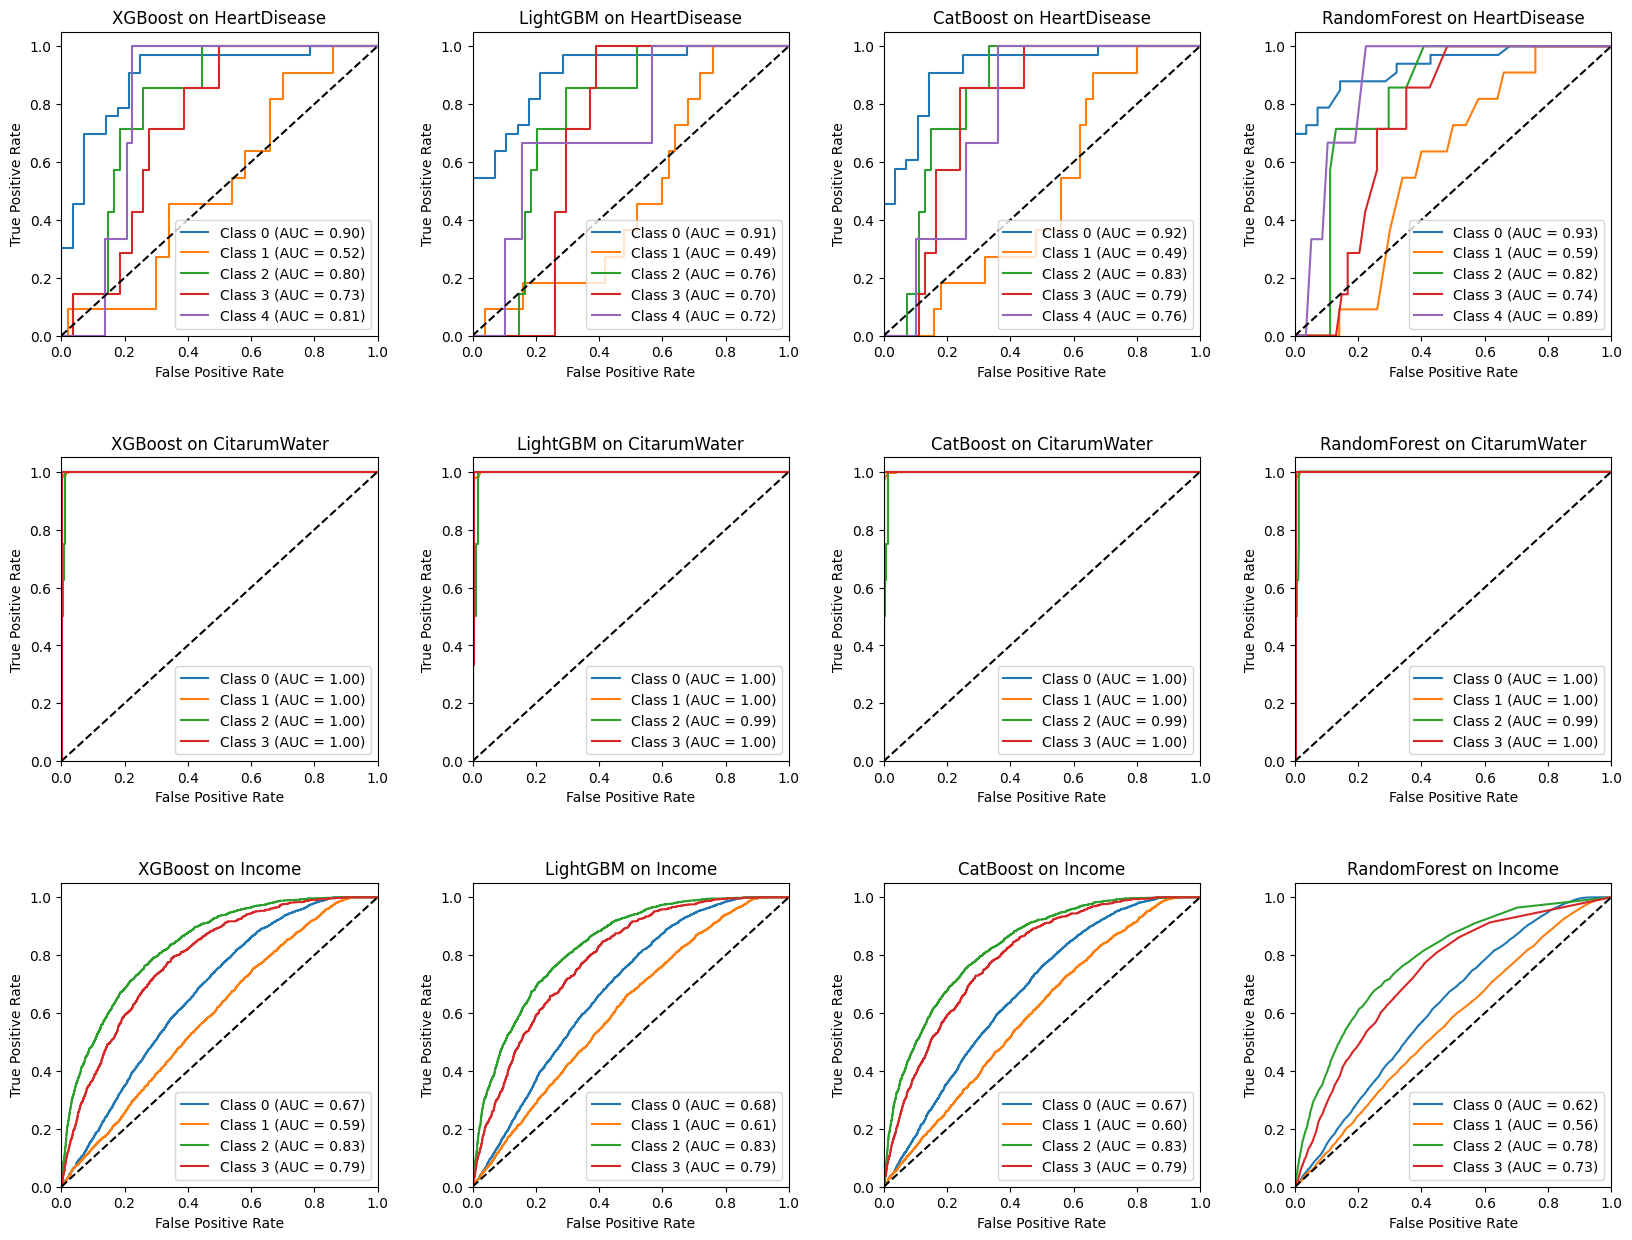

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Plotting ROC curves
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

datasets = {
    "HeartDisease": (X_train_heart, y_train_heart, X_test_heart, y_test_heart, 'num'),
    "CitarumWater": (X_train_citarum, y_train_citarum, X_test_citarum, y_test_citarum, 'Class'),
    "Income": (X_train_income, y_train_income, X_test_income, y_test_income, 'income')
}

models = {
    "XGBoost": [xgb_model_heart, xgb_model_citarum, xgb_model_income],
    "LightGBM": [lgb_model_heart, lgb_model_citarum, lgb_model_income],
    "CatBoost": [catboost_model_heart, catboost_model_citarum, catboost_model_income],
    "RandomForest": [rf_model_heart, rf_model_citarum, rf_model_income],
}

for i, (dataset_name, (X_train, y_train, X_test, y_test, target_column)) in enumerate(datasets.items()):
    for j, (model_name, model_list) in enumerate(models.items()):
        model = model_list[i]
        ax = axes[i, j]

        if model is not None:
            try:
                y_score = model.predict_proba(X_test)
                n_classes = len(np.unique(y_test))
                if n_classes > 2:
                    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
                    for k in range(n_classes):
                        fpr, tpr, _ = roc_curve(y_test_bin[:, k], y_score[:, k])
                        roc_auc = auc(fpr, tpr)
                        ax.plot(fpr, tpr, label=f'Class {k} (AUC = {roc_auc:.2f})')
                else:
                    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
                    roc_auc = auc(fpr, tpr)
                    ax.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

                ax.plot([0, 1], [0, 1], 'k--')
                ax.set_xlim([0.0, 1.0])
                ax.set_ylim([0.0, 1.05])
                ax.set_xlabel('False Positive Rate')
                ax.set_ylabel('True Positive Rate')
                ax.set_title(f'{model_name} on {dataset_name}')
                ax.legend(loc="lower right")
            except ValueError as e:
                print(f"Error plotting ROC curve for {model_name} on {dataset_name}: {e}")
                ax.set_title(f'Error: {model_name} on {dataset_name}')
        else:
            ax.set_title(f'Model not trained: {model_name} on {dataset_name}')
plt.show()

## Summary:
Analisis data dari tiga dataset menunjukkan berbagai temuan penting dalam proses pra-pemrosesan dan evaluasi model. Pada dataset HeartDisease, ditemukan nilai hilang pada kolom 'ca' dan 'thal' yang diimputasi menggunakan modus, serta outlier pada kolom 'chol' dan 'oldpeak' yang ditangani menggunakan metode IQR. Dataset CitarumWater mengalami masalah pada tipe data kolom 'Temp' dan 'O2', yang kemudian dikonversi menjadi numerik dan diimputasi dengan rata-rata. Outlier pada beberapa kolom juga ditangani menggunakan metode IQR, dan fitur interaksi baru bernama 'BOD_COD_interaction' dibuat untuk menambah informasi. Sementara itu, dataset Income memiliki nilai hilang pada kolom 'workclass', 'occupation', dan 'native-country' yang diisi dengan label 'Missing'. Outlier pada kolom 'capital-gain' dan 'capital-loss' dikoreksi menggunakan transformasi logaritmik, dan fitur polinomial derajat 2 dibuat untuk beberapa fitur numerik. Untuk seluruh dataset, dilakukan label encoding terhadap fitur kategorikal sebelum pelatihan model. Empat model yaitu XGBoost, LightGBM, CatBoost, dan RandomForest dilatih pada masing-masing dataset, dengan penyesuaian parameter khusus untuk menangani ketidakseimbangan kelas pada dataset Income. Evaluasi model mencakup metrik akurasi, presisi, recall, F1-score, dan AUC, disertai dengan confusion matrix untuk visualisasi serta ROC curve guna memberikan gambaran lebih jelas terhadap performa model.
